# This notebook shows how to generate basic statistics for the paper

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import scipy.sparse as spr
from mpl_toolkits.axes_grid1 import AxesGrid
from scipy.ndimage.filters import gaussian_filter
from cartopy.mpl.geoaxes import GeoAxes
import matplotlib.patheffects as PathEffects
import calendar

from_proj = ccrs.PlateCarree()

def draw_rects(ax):
    
    shp_dir = "../data/shapefiles/analysis/"
    
    for shp_name in ['cornbelt', 'high_plains', 'mid_south', 'north_plains', 'north_east', 'econus']:
        shp = shpreader.Reader(shp_dir + shp_name + "_latlon")
        for outline, info in zip(shp.geometries(), shp.records()):
            ax.add_geometries([outline], ccrs.PlateCarree(),
                              facecolor='None', edgecolor='k', linewidth=2, zorder=10)
    return ax

def draw_geography(ax):
        
    countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
    
    for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='Grey', edgecolor='k')
            
    lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
    
    for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=2)
            
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'))
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='face', 
                                                facecolor='None')) 
    
    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural', name=shapename)

    for state, info in zip(shpreader.Reader(states_shp).geometries(), shpreader.Reader(states_shp).records()):
        if info.attributes['admin'] == 'United States of America':

            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='None', edgecolor='k')

    return ax 

def draw_labels(ax, axgr, classes):

    cmap = plt.cm.viridis
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

    xg, yg = np.meshgrid(classes, classes)
    p = ax.pcolormesh(xg, yg, xg, norm=norm, cmap=cmap, zorder=0)

    axgr.cbar_axes[0].colorbar(p)
    axgr.cbar_axes[0].set_xticks(classes)
    classes[0] += 1
    labels = [str(x) for x in classes[:-1]]
    labels[-1] += "+"
    axgr.cbar_axes[0].set_xticklabels(labels, fontsize=25)
    
lons, lats = np.loadtxt("../data/now_interp_lons.txt"), np.loadtxt("../data/now_interp_lats.txt")

Example of MCS spatial occurrence.  Choose any month(s) & year combo to examine.

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


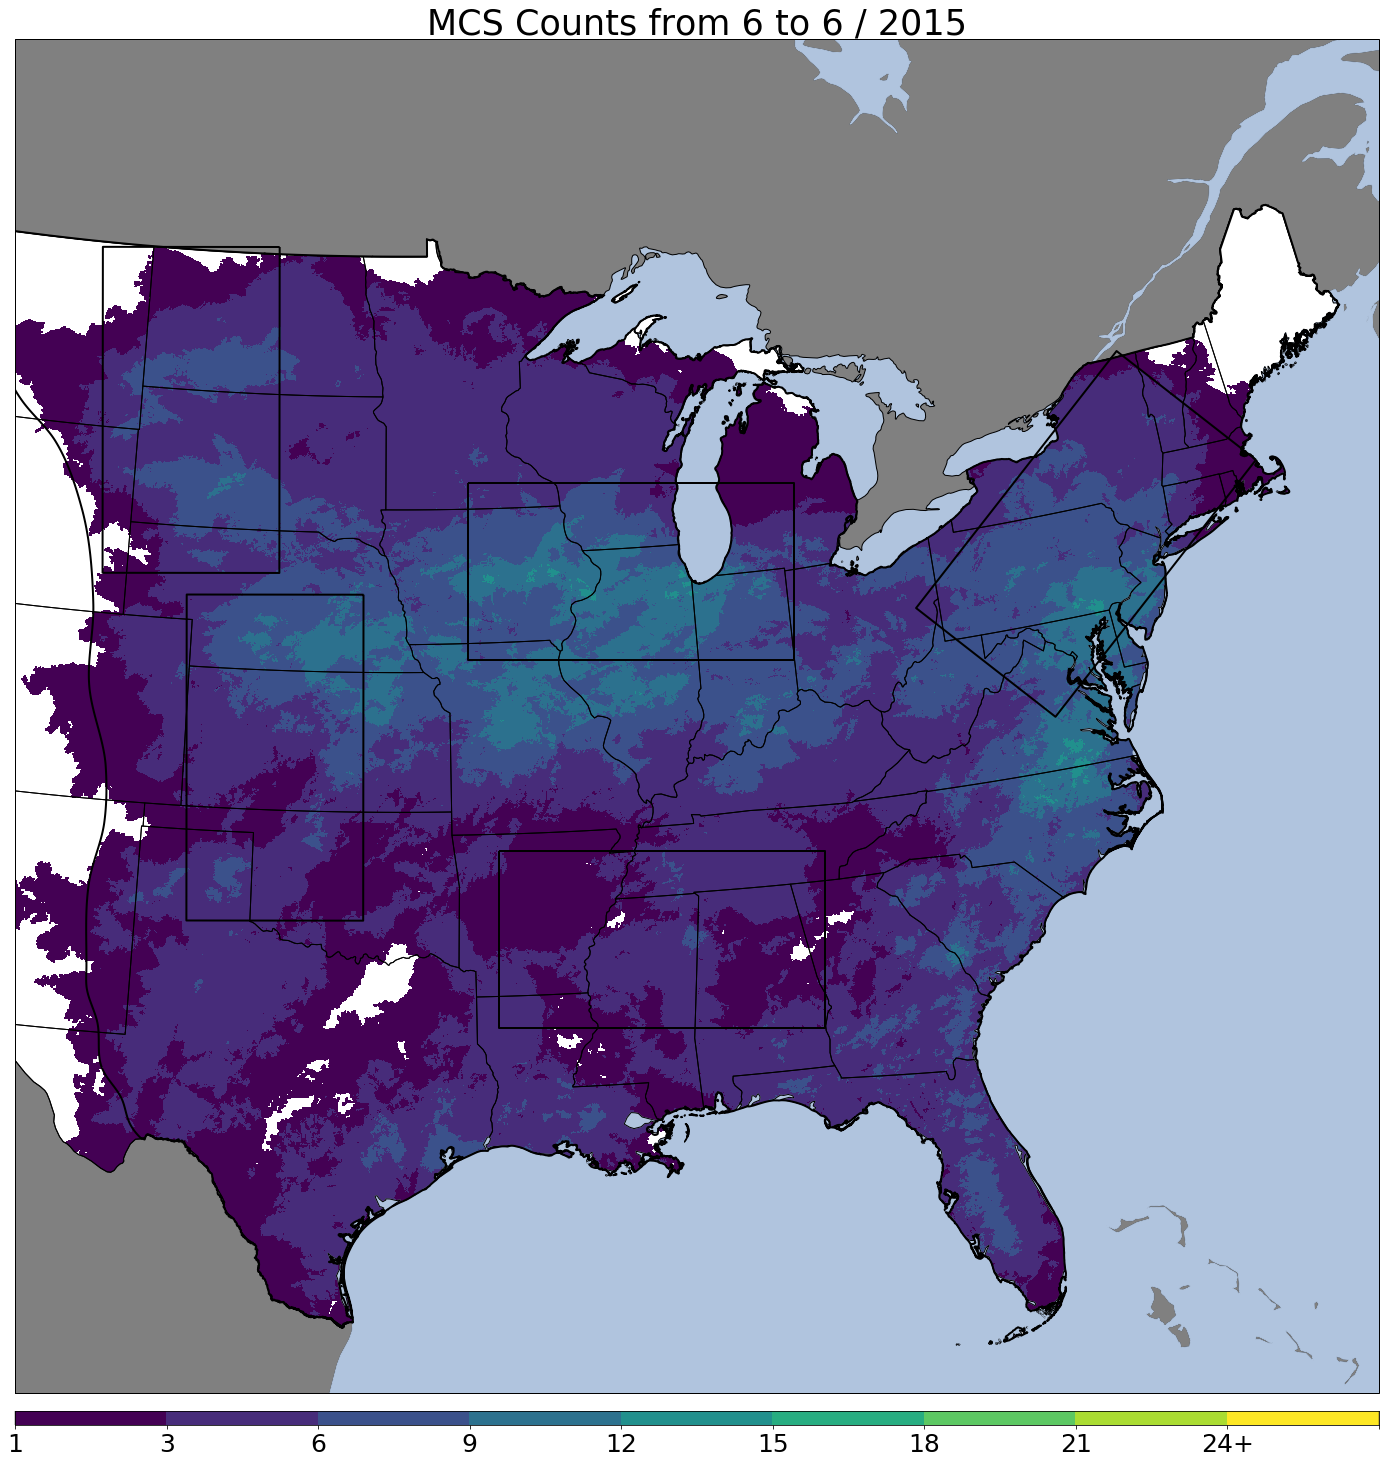

In [2]:
from matplotlib.colors import BoundaryNorm
cmap = plt.cm.viridis
classes = list(range(0, 30, 3))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

plt.rcParams['figure.figsize'] = 20, 20

top_dir = "../data/nowrad_climo/"


projection = cartopy.crs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5, false_easting=0.0, 
                            false_northing=0.0, standard_parallels=(29.5, 45.5), globe=None)
axes_class = (GeoAxes,
              dict(map_projection=projection))

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=.5,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=-.25,
                cbar_size='1%',
                label_mode='')

year = 2015
months = [6]

for spl, ax in enumerate(axgr):

    ax.set_extent([-105, -73, 24, 52], crs=ccrs.PlateCarree())
    
    month_res = np.zeros(shape=(1370, 1732), dtype=int)
    
    for month in months:

        fname = top_dir + str(year) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_now.npz"

        month_res += spr.load_npz(fname).toarray()

    month_res = np.ma.masked_where(month_res < 1, month_res)
    
    ax.pcolormesh(lons, lats, month_res, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=1)
    ax.set_title("MCS Counts from " + str(months[0]) + " to " + str(months[-1]) + " / " + str(year), fontsize=35)
    ax = draw_geography(ax)
    ax = draw_rects(ax)

draw_labels(ax, axgr, classes.copy())    

plt.tight_layout()

Making Figure 1

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


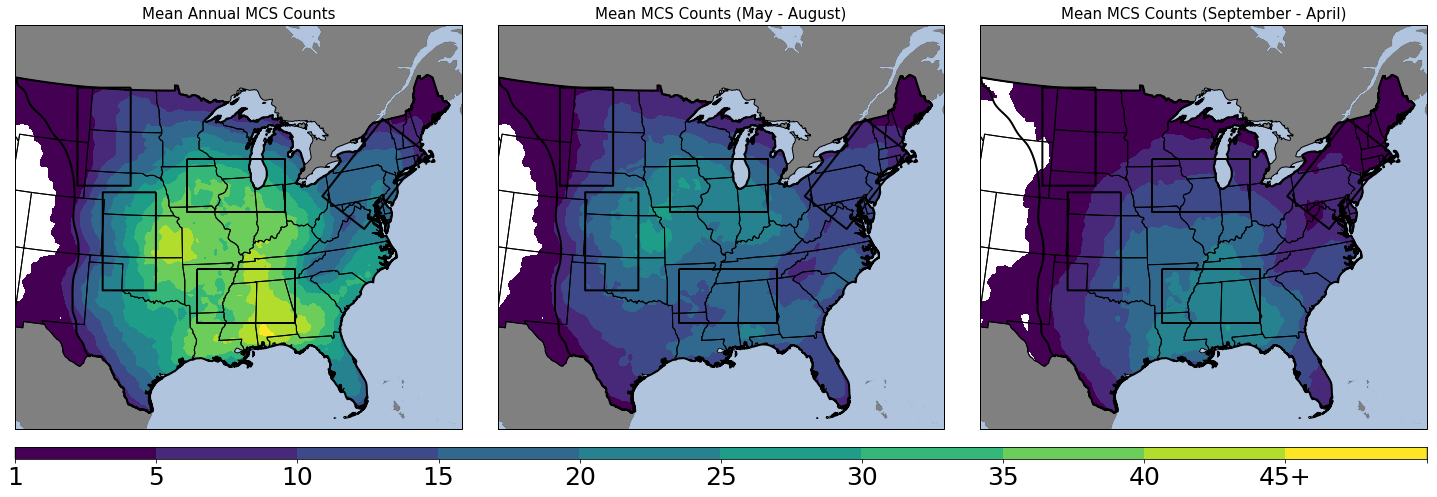

In [3]:
from matplotlib.colors import BoundaryNorm
cmap = plt.cm.viridis
classes = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

plt.switch_backend('AGG')

plt.rcParams['figure.figsize'] = 20, 20

top_dir = "../data/nowrad_climo/"

months = [list(range(1, 13)), (5, 6, 7, 8), (9, 10, 11, 12, 1, 2, 3, 4)]

labs = ['Mean Annual MCS Counts', 'Mean MCS Counts (May - August)', 'Mean MCS Counts (September - April)']

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 3),
                axes_pad=.5,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=-.25,
                cbar_size='1%',
                label_mode='')

for spl, ax in enumerate(axgr):

    ax.set_extent([-107.8, -73, 24, 52], crs=ccrs.PlateCarree())

    month_res = np.zeros(shape=(1370, 1732))

    yrcnt = 0
    
    for year in range(1996, 2018):

        for month in months[spl]:
            fname = top_dir + str(year) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_now.npz"

            month_res += spr.load_npz(fname).toarray()

        yrcnt += 1

    r = gaussian_filter(month_res, 5)
    month_res = np.ma.masked_where(r < 1, r)

    ax.pcolormesh(lons, lats, month_res/yrcnt, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=1)
    ax.set_title(labs[spl], fontsize=15)
    ax = draw_geography(ax)
    ax = draw_rects(ax)

draw_labels(ax, axgr, classes.copy())    

plt.tight_layout()

#plt.savefig("Fig1.tif", bbox_inches='tight', dpi=300)

Examine total MCS rainfall and percent MCS rainfall for a given month & year combo.

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide
C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in less
C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in less


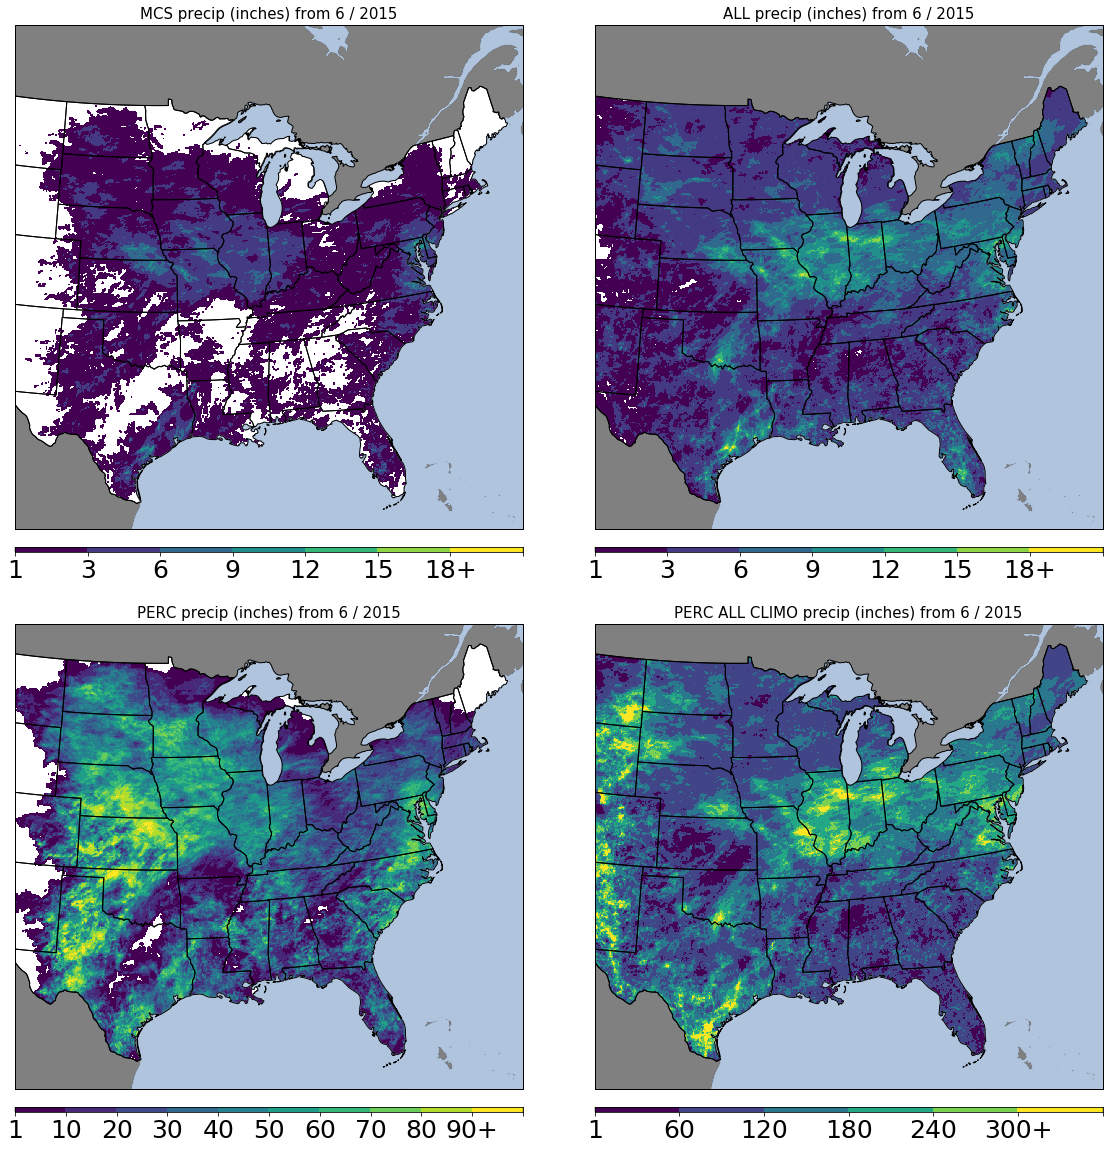

In [4]:
import pickle

cmap = plt.cm.viridis
classes = [0, 3, 6, 9, 12, 15, 18, 21]
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

top_dir = ["../data/stageiv_climo/", "../data/stageiv_climo_all/"]
title = ["MCS", "ALL", "PERC", "PERC ALL CLIMO"]

year = 2015
month = 6

def draw_labels(ax, axgr, i, classes):

    cmap = plt.cm.viridis
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

    xg, yg = np.meshgrid(classes, classes)
    p = ax.pcolormesh(xg, yg, xg, norm=norm, cmap=cmap, zorder=0)

    axgr.cbar_axes[i].colorbar(p)
    axgr.cbar_axes[i].set_xticks(classes)
    classes[0] += 1
    labels = [str(x) for x in classes[:-1]]
    labels[-1] += "+"
    axgr.cbar_axes[i].set_xticklabels(labels, fontsize=25)
    
lats, lons = np.loadtxt("../data/st4_interp_lats.txt"), np.loadtxt("../data/st4_interp_lons.txt")

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(2, 2),
                axes_pad=1,
                cbar_location='bottom',
                cbar_mode='each',
                cbar_pad=.25,
                cbar_size='1%',
                label_mode='')
for spl, ax in enumerate(axgr):

    if spl < 2:
        
        classes = [0, 3, 6, 9, 12, 15, 18, 21]
        norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

        ax.set_extent([-105, -73, 24, 52], crs=ccrs.PlateCarree())

        month_res = np.zeros(shape=(685, 866))

        fname = top_dir[spl] + str(year) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_st4.npz"

        month_res += spr.load_npz(fname).toarray() * 0.0393701

        month_res = np.ma.masked_where(month_res < 1, month_res)
        
        ax.pcolormesh(lons, lats, month_res, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=1)
    else:
        
        if spl == 2:
            
            classes = list(range(0, 110, 10))
            norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

            fname = top_dir[0] + str(year) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_st4.npz"

            month_res = spr.load_npz(fname).toarray()

            fname = top_dir[1] + str(year) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_st4.npz"

            month_res /= spr.load_npz(fname).toarray()

            month_res = np.ma.masked_where(month_res < .01, month_res)
        else:
            
            classes = list(range(0, 400, 60))
            norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
            
            month_res = np.zeros(shape=(685, 866))
            climo = np.zeros(shape=(685, 866))
            ycnt = 0
            for y in range(2002, 2018):
                if y != year:
                    ycnt += 1
                    fname = top_dir[1] + str(y) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_st4.npz"
                    climo += spr.load_npz(fname).toarray()
                else:
                    ycnt += 1
                    fname = top_dir[1] + str(y) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_st4.npz"
                    month_res = spr.load_npz(fname).toarray()
                    climo += spr.load_npz(fname).toarray()
            climo /= ycnt
            
            month_res /= climo
            
            month_res = np.ma.masked_where(month_res < .01, month_res)
                    
        ax.pcolormesh(lons, lats, 100*month_res, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=1)
    ax.set_title(title[spl] + " precip (inches) from " + str(month) + " / " + str(year), fontsize=15)
    ax = draw_geography(ax)

    draw_labels(ax, axgr, spl, classes.copy())    

#plt.tight_layout()

Making Figure 6

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


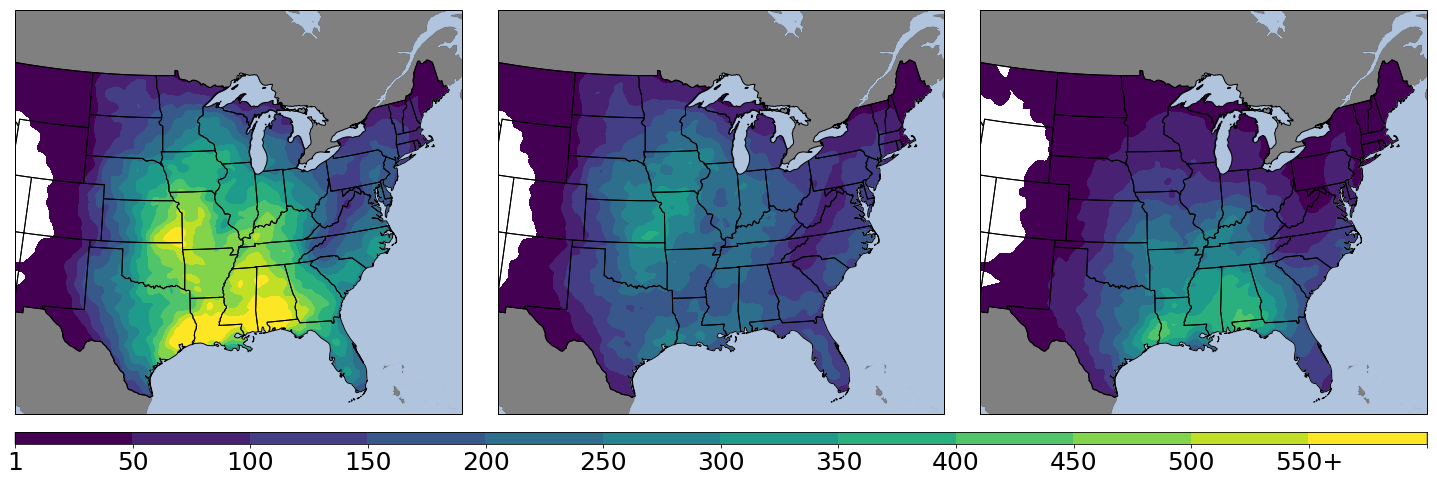

In [5]:
cmap = plt.cm.viridis
classes = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

def draw_labels(ax, axgr, classes):

    cmap = plt.cm.viridis
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

    xg, yg = np.meshgrid(classes, classes)
    p = ax.pcolormesh(xg, yg, xg, norm=norm, cmap=cmap, zorder=0)

    axgr.cbar_axes[0].colorbar(p)
    axgr.cbar_axes[0].set_xticks(classes)
    classes[0] += 1
    labels = [str(x) for x in classes[:-1]]
    labels[-1] += "+"
    axgr.cbar_axes[0].set_xticklabels(labels, fontsize=25)
    
top_dir = "../data/stageiv_climo/"

months = [list(range(1, 13)), (5, 6, 7, 8), (9, 10, 11, 12, 1, 2, 3, 4)]

labs = ['Mean Annual MCS Precipitation', 
        'Mean MCS Precipitation (May - August)', 
        'Mean MCS Precipitation (September - April)']

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 3),
                axes_pad=.5,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=-.25,
                cbar_size='1%',
                label_mode='')
for spl, ax in enumerate(axgr):

    ax.set_extent([-107.8, -73, 24, 52], crs=ccrs.PlateCarree())

    month_res = np.zeros(shape=(685, 866), dtype=float)

    yrcnt = 0
    for year in range(2002, 2018):

        for month in months[spl]:
            fname = top_dir + str(year) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_st4.npz"

            month_res += spr.load_npz(fname).toarray()

        yrcnt += 1

    r = gaussian_filter(month_res, 5)
    month_res = np.ma.masked_where(r < 1, r)

    ax.pcolormesh(lons, lats, month_res/yrcnt, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=1)
    #ax.set_title(labs[spl], fontsize=15)
    ax = draw_geography(ax)

draw_labels(ax, axgr, classes.copy())    

plt.tight_layout()

plt.savefig("Fig6.tif", bbox_inches='tight', dpi=300)

Making Figure 6 (Cont.)

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less
C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


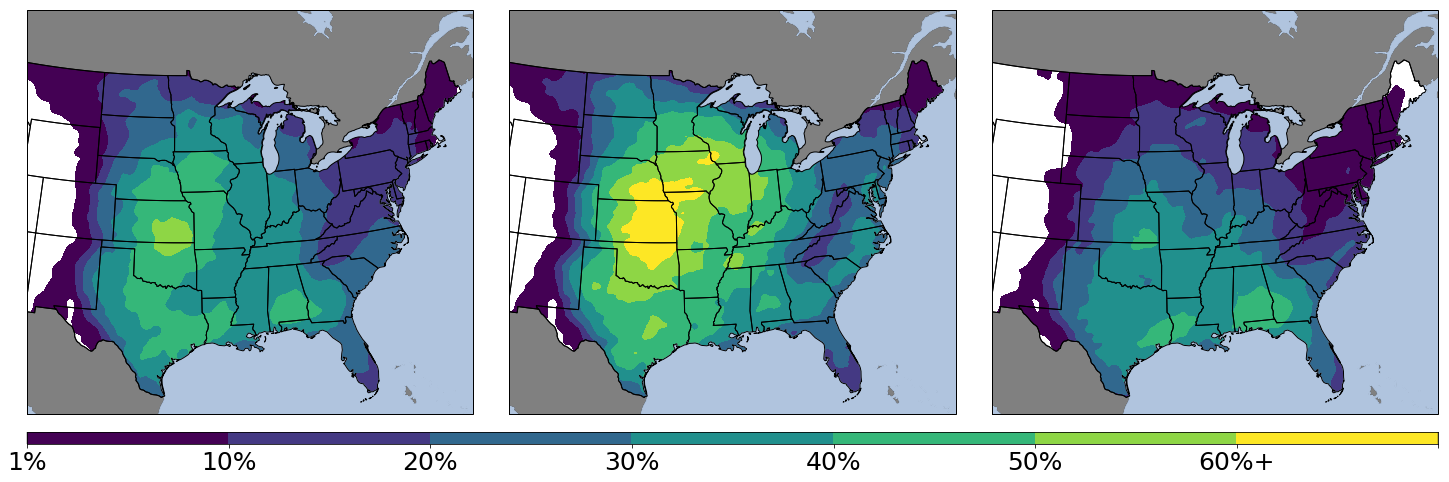

In [6]:
def draw_labels_perc(ax, axgr, classes):

    cmap = plt.cm.viridis
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

    xg, yg = np.meshgrid(classes, classes)
    p = ax.pcolormesh(xg, yg, xg, norm=norm, cmap=cmap, zorder=0)

    axgr.cbar_axes[0].colorbar(p)
    axgr.cbar_axes[0].set_xticks(classes)
    classes[0] += 1
    labels = [str(x) + "%" for x in classes[:-1]]
    labels[-1] += "+"
    axgr.cbar_axes[0].set_xticklabels(labels, fontsize=25) 

all_dir = "../data/stageiv_climo_all/"

cmap = plt.cm.viridis
classes = [0, 10, 20, 30, 40, 50, 60, 70]
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

months = [list(range(1, 13)), (5, 6, 7, 8), (9, 10, 11, 12, 1, 2, 3, 4)]

labs = ['Annual % MCS Precipitation', 
        '% MCS Precipitation (May - August)', 
        '% MCS Precipitation (September - April)']

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 3),
                axes_pad=.5,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=-.25,
                cbar_size='1%',
                label_mode='')
for spl, ax in enumerate(axgr):

    ax.set_extent([-107.8, -73, 24, 52], crs=ccrs.PlateCarree())

    month_res = np.zeros(shape=(685, 866))
    all_res = np.zeros(shape=(685, 866))

    yrcnt = 0
    for year in range(2002, 2018):

        for month in months[spl]:
            fname = top_dir + str(year) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_st4.npz"
            month_res += spr.load_npz(fname).toarray()
            
            fname = all_dir + str(year) + "/" + str(month) + "/month_" + str(month).zfill(2) + "_accum_st4.npz"
            all_res += spr.load_npz(fname).toarray()

    month_res = 100*(month_res / all_res)
    r = gaussian_filter(month_res, 5)
    month_res = np.ma.masked_where(r < 1, r)

    ax.pcolormesh(lons, lats, month_res, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=1)
    #ax.set_title(labs[spl], fontsize=15)
    ax = draw_geography(ax)

draw_labels_perc(ax, axgr, classes.copy())    

plt.tight_layout()

#plt.savefig("Fig6a.tif", bbox_inches='tight', dpi=300)

Making Figure 7

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


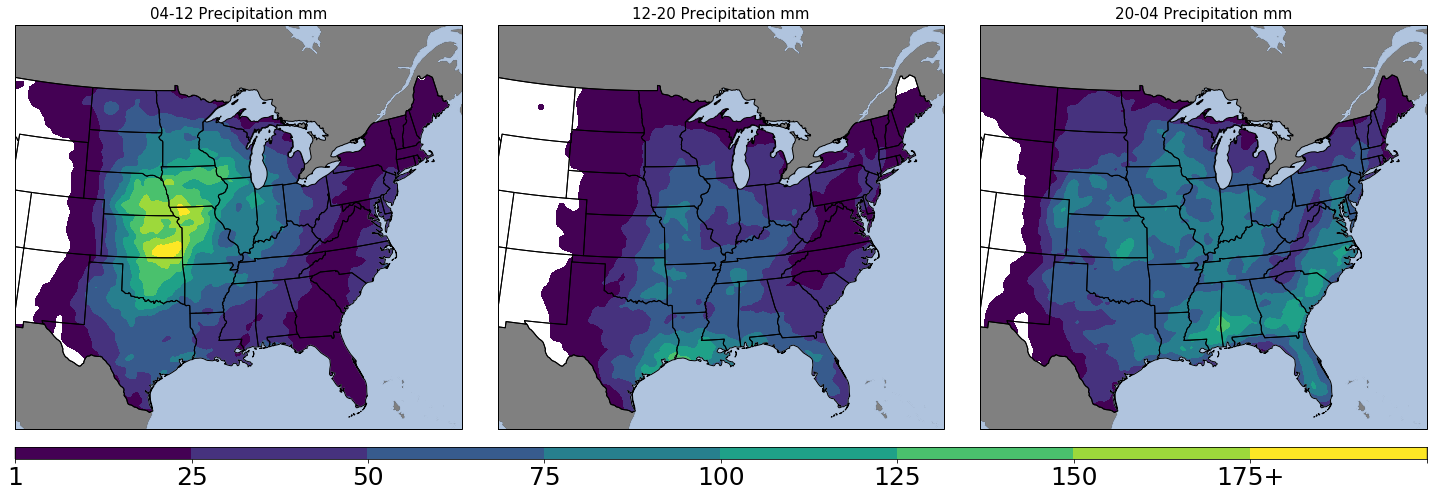

In [7]:
cmap = plt.cm.viridis
classes = [0, 25, 50, 75, 100, 125, 150, 175, 200]
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

def draw_labels(ax, axgr, classes):

    cmap = plt.cm.viridis
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

    xg, yg = np.meshgrid(classes, classes)
    p = ax.pcolormesh(xg, yg, xg, norm=norm, cmap=cmap, zorder=0)

    axgr.cbar_axes[0].colorbar(p)
    axgr.cbar_axes[0].set_xticks(classes)
    classes[0] += 1
    labels = [str(x) for x in classes[:-1]]
    labels[-1] += "+"
    axgr.cbar_axes[0].set_xticklabels(labels, fontsize=25)

top_dir = "../data/stageiv_climo/"

hours = [(5, 6, 7, 8, 9, 10, 11, 12), 
         (13, 14, 15, 16, 17, 18, 19, 20), 
         (21, 22, 23, 0, 1, 2, 3, 4)]

labs = ['04-12 Precipitation', '12-20 Precipitation', '20-04 Precipitation']

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 3),
                axes_pad=.5,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=-.25,
                cbar_size='1%',
                label_mode='')
for spl, ax in enumerate(axgr):

    ax.set_extent([-107.8, -73, 24, 52], crs=ccrs.PlateCarree())

    hours_res = np.zeros(shape=(685, 866))

    yrcnt = 0
    for year in range(2002, 2018):

        for month in [5, 6, 7, 8]:
            for hour in hours[spl]:
                fname = top_dir + str(year) + "/" + str(month) + "/hour_" + str(hour).zfill(2) + "_accum_st4.npz"
                hours_res += spr.load_npz(fname).toarray()

        yrcnt += 1
        
    r = gaussian_filter(hours_res/yrcnt, 5)
    hours_res = np.ma.masked_where(r < 1, r)

    ax.pcolormesh(lons, lats, hours_res, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=1)
    ax.set_title(labs[spl] + " mm", fontsize=15)
    ax = draw_geography(ax)

draw_labels(ax, axgr, classes.copy())    

plt.tight_layout()
#plt.savefig("Fig7a.tif", bbox_inches='tight', dpi=300)

Making Figure 7 (Cont.)

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


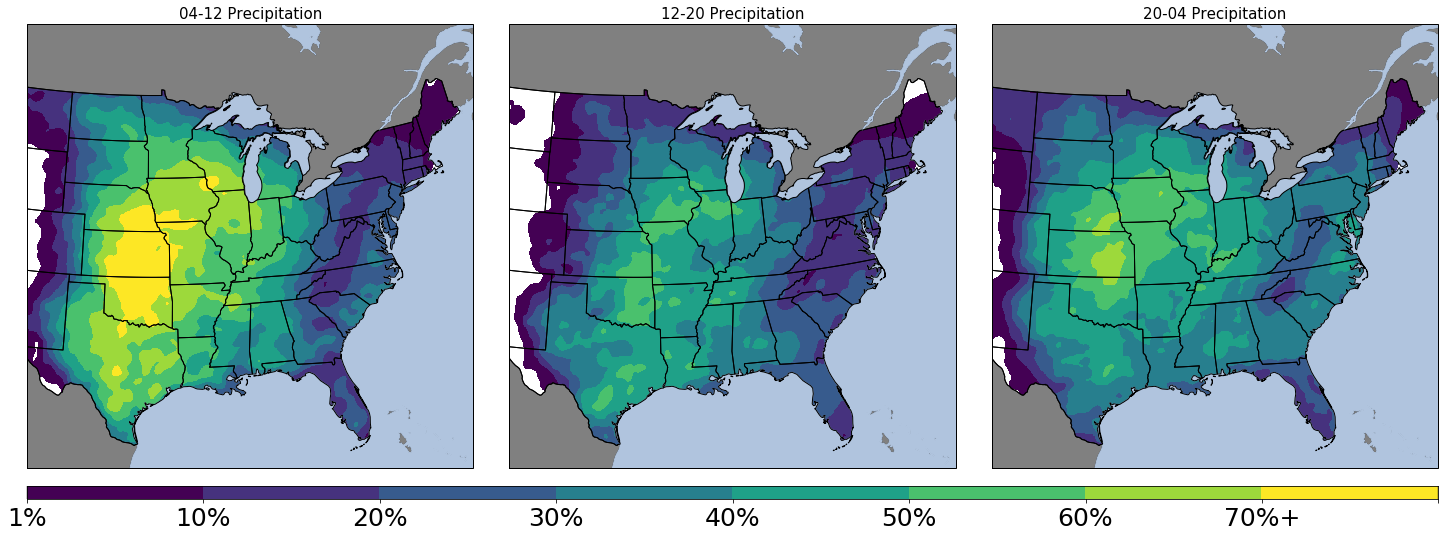

In [8]:
cmap = plt.cm.viridis
classes = [0, 10, 20, 30, 40, 50, 60, 70, 80]
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

hours = [(5, 6, 7, 8, 9, 10, 11, 12), 
         (13, 14, 15, 16, 17, 18, 19, 20), 
         (21, 22, 23, 0, 1, 2, 3, 4)]

labs = ['04-12 Precipitation', '12-20 Precipitation', '20-04 Precipitation']

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 3),
                axes_pad=.5,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=-.25,
                cbar_size='1%',
                label_mode='')

for spl, ax in enumerate(axgr):

    ax.set_extent([-105, -73, 24, 52], crs=ccrs.PlateCarree())

    hours_res = np.zeros(shape=(685, 866))
    all_res = np.zeros(shape=(685, 866))

    yrcnt = 0
    for year in range(2002, 2018):

        for month in [5, 6, 7, 8]:
            for hour in hours[spl]:
                fname = top_dir + str(year) + "/" + str(month) + "/hour_" + str(hour).zfill(2) + "_accum_st4.npz"
                hours_res += spr.load_npz(fname).toarray()

                fname = all_dir + str(year) + "/" + str(month) + "/hour_" + str(hour).zfill(2) + "_accum_st4.npz"
                all_res += spr.load_npz(fname).toarray()

    hours_res = 100*(hours_res / all_res)
    r = gaussian_filter(hours_res, 5)
    hours_res = np.ma.masked_where(r < 1, r)

    ax.pcolormesh(lons, lats, hours_res, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=1)
    ax.set_title(labs[spl], fontsize=15)
    ax = draw_geography(ax)

draw_labels_perc(ax, axgr, classes.copy())    

plt.tight_layout()
#plt.savefig("Fig7a.tif", bbox_inches='tight', dpi=300)